O Dataset usado neste MVP é "Wholesale customers Data Set', o qual refere-se a clientes de um distribuidor atacadista. Essa segmentação dos clientes pode ajudar a entender melhor as necessidades e preferências dos clientes, permitindo que o distribuidor atacadista direcione suas estratégias de marketing de forma mais eficiente, oferecendo produtos específicos e personalizados de cada segmento, de acordo  aos padrões de vendas nas diferentes categorias de produtos por região. O dataset em questão esta disponivel no Kaggle.

Esse dataset consiste da venda de varios departamentos em diversas categorias de produtos do atacado, incluindo o gasto anual em unidades monetárias (m.u.).

O dataset apresenta  oito atributos relacionados a venda de protudos e uma variável de classe  Channel: Horeca (Hotel/Restaurante/Café) ou Canal Retalho (nominal), binária  (1 ou 2).

1 - Fresh (Fresco): gasto anual (m.u.) em produtos frescos;

2 - Milk (Leite): gasto anual (m.u.) com produtos lácteos;

3 - Grocery (Mercearia): gasto anual (m.u.) em produtos de mercearia;

4 - Frozen (Congelados): gastos anuais (m.u.) com produtos congelados;

5 - Detergents_Paper (Detergente e papel): gasto anual (m.u.) em detergentes e produtos de papel;

6 - Delicassen (Frageis): gasto anual (m.u.) em produtos frageis;

7 - Channel (Canal): Canal dos clientes - Horeca (Hotel/Restaurante/Café) ou Canal Retalho (nominal);

8 - Region (Região): Região dos clientes – Lisboa, Porto ou Outra.

                        


In [ ]:
# configuração para não exibir os warnings
import warnings
warnings.filterwarnings('ignore')

# Imports necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

Utilizando o pandas irei realizar o carregamento do dataset a partir da URL onde ele esta disponível no Ghithub, carregando-o para a variável dataset e exibir as primeiras linhas conforme a seguir:

In [ ]:
# Informa a URL de importação do dataset
url = "https://raw.githubusercontent.com/Cristiano1120/datascience/main/Wholesale_customers_data.csv"

# Lê o arquivo com o parâmetro error_bad_lines=False
dataset = pd.read_csv(url, delimiter=',', error_bad_lines=False)

# Mostra as primeiras linhas do dataset
dataset.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


OBSERVAÇÃO: Nesta etapa, poderíamos realizar outras operações se as mesmas fossem necessárias, tais como; a preparação de dados, limpeza entre outros, porem já sabemos de antemão que o conjunto de dados já está limpo.

A seguir, será realizado a separação do dataset nas bases de trino e teste, com o método holdout, métrica de acurácia e a configuraçao dos parâmetros de número de 10 folds.


In [ ]:
test_size = 0.20 # tamanho do conjunto de teste
seed = 8 # semente aleatória

# Separação em conjuntos de treino e teste
array = dataset.values
X = array[:,0:8] # Atributos
y = array[:,1] # Classe target
X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=test_size, shuffle=True, random_state=seed, stratify=y) # holdout com estratificação

# Parâmetros e partições da validação cruzada
scoring = 'accuracy'
num_particoes = 10
kfold = StratifiedKFold(n_splits=num_particoes, shuffle=True, random_state=seed) # validação cruzada com estratificação

Continuando, aplicando vários modelos diferentes com suas configurações padrão. Utilizaremos os modelos de Regressão Logística, K-vizinhos mais próximos (KNN), Árvores de Classificação (CART), Naive Bayes (NB) e Máquinas de vetores de suporte (SVM). Logo em seguida, utilizarei a validação cruzada para treinar e avaliar os modelos usando a métrica acuracia para a etapa de nodelagem e inferência.

In [ ]:
np.random.seed(8) # definindo uma semente global

# Lista que armazenará os modelos
models = []

# Criando os modelos e adicionando-os na lista de modelos
models.append(('LR', LogisticRegression(max_iter=200)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Definindo os parâmetros do classificador base para o BaggingClassifier
base = DecisionTreeClassifier()
num_trees = 100
max_features = 2

# Criando os modelos para o VotingClassifier
bases = []
model1 = LogisticRegression(max_iter=200)
bases.append(('logistic', model1))
model2 = DecisionTreeClassifier()
bases.append(('cart', model2))
model3 = SVC()
bases.append(('svm', model3))

# Criando os ensembles e adicionando-os na lista de modelos
models.append(('Bagging', BaggingClassifier(base_estimator=base, n_estimators=num_trees)))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('Ada', AdaBoostClassifier(n_estimators=num_trees)))
models.append(('GB', GradientBoostingClassifier(n_estimators=num_trees)))
models.append(('Voting', VotingClassifier(bases)))

# Listas para armazenar os resultados
results = []
names = []

# Avaliação dos modelos
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)


LR: 0.730238 (0.027763)
KNN: 0.676111 (0.044637)
CART: 1.000000 (0.000000)
NB: 0.946190 (0.036260)
SVM: 0.718889 (0.017391)
Bagging: 1.000000 (0.000000)
RF: 0.997143 (0.008571)
ET: 1.000000 (0.000000)
Ada: 1.000000 (0.000000)
GB: 1.000000 (0.000000)
Voting: 0.755714 (0.022315)


Os resultados sugerem que CART, Bagging, ET, Ada e o GB têm pontencial para serem bons modelos. Entretanto, vale observar que esses valores são apenas valores médios de acurácia, sendo prudente avaliar a distribuição de cada fold da validação cruzada, o que será demosntrado a seguir comparando os modelos usando boxplots:

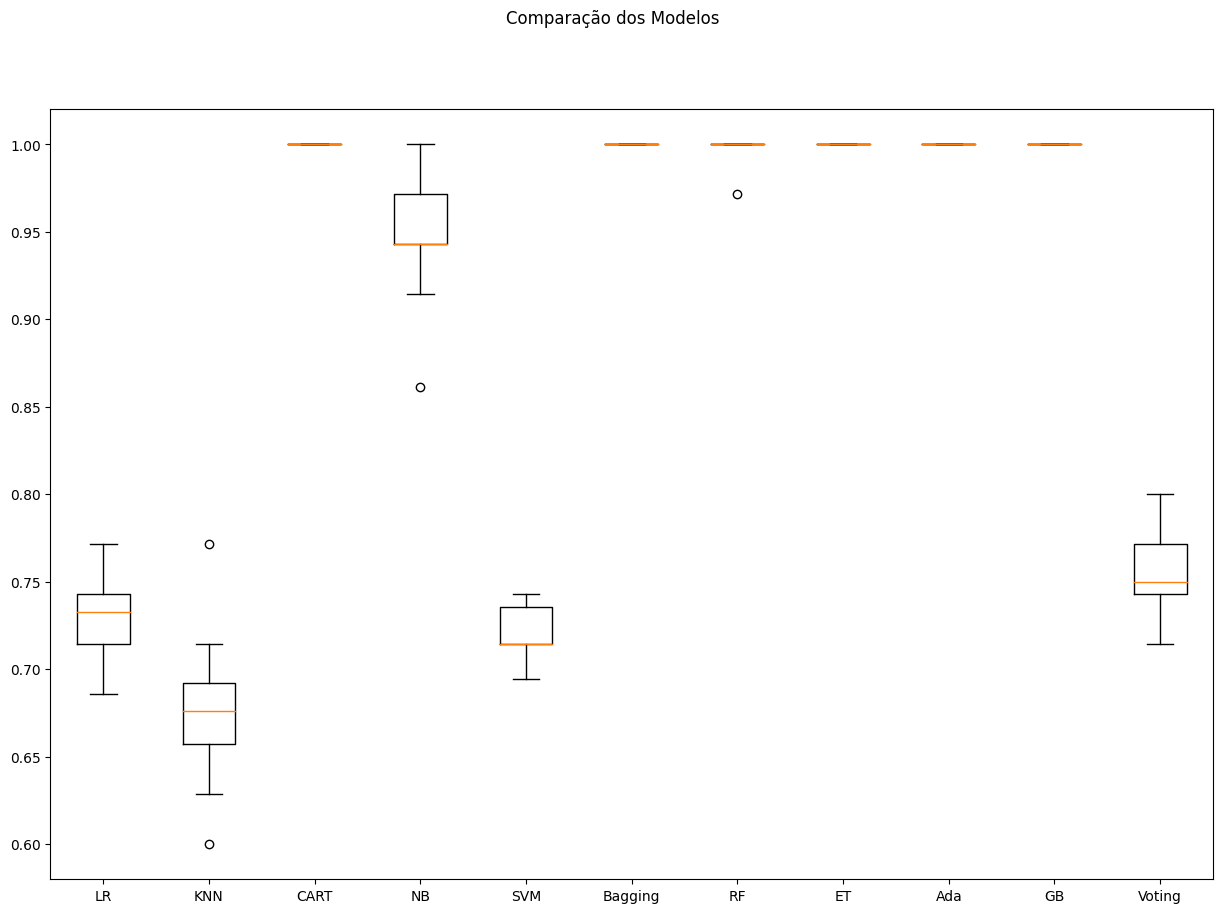

In [ ]:
# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(15,10))
fig.suptitle('Comparação dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Neste passo irei utilizar a biblioteca Pipeline para reptir o processo avaliando o modelo com a validação cruzada com os dados padronizados e normalizados para evitar o vazamento de dados e comparar os resultados dos modelos treinados com os dados orignais:

LR-orig: 0.730 (0.028)
KNN-orig: 0.676 (0.045)
CART-orig: 1.000 (0.000)
NB-orig: 0.946 (0.036)
SVM-orig: 0.719 (0.017)
Bag-orig: 1.000 (0.000)
RF-orig: 0.997 (0.009)
ET-orig: 1.000 (0.000)
Ada-orig: 1.000 (0.000)
GB-orig: 1.000 (0.000)
Vot-orig: 0.756 (0.022)
LR-padr: 1.000 (0.000)
KNN-padr: 0.974 (0.024)
CART-padr: 1.000 (0.000)
NB-padr: 1.000 (0.000)
SVM-padr: 0.989 (0.019)
Bag-padr: 1.000 (0.000)
RF-padr: 1.000 (0.000)
ET-padr: 0.997 (0.009)
Ada-padr: 1.000 (0.000)
GB-padr: 1.000 (0.000)
Vot-padr: 1.000 (0.000)
LR-norm: 0.980 (0.022)
KNN-norm: 0.994 (0.011)
CART-norm: 1.000 (0.000)
NB-norm: 1.000 (0.000)
SVM-norm: 0.994 (0.011)
Bag-norm: 1.000 (0.000)
RF-norm: 1.000 (0.000)
ET-norm: 1.000 (0.000)
Ada-norm: 1.000 (0.000)
GB-norm: 1.000 (0.000)
Vot-norm: 1.000 (0.000)


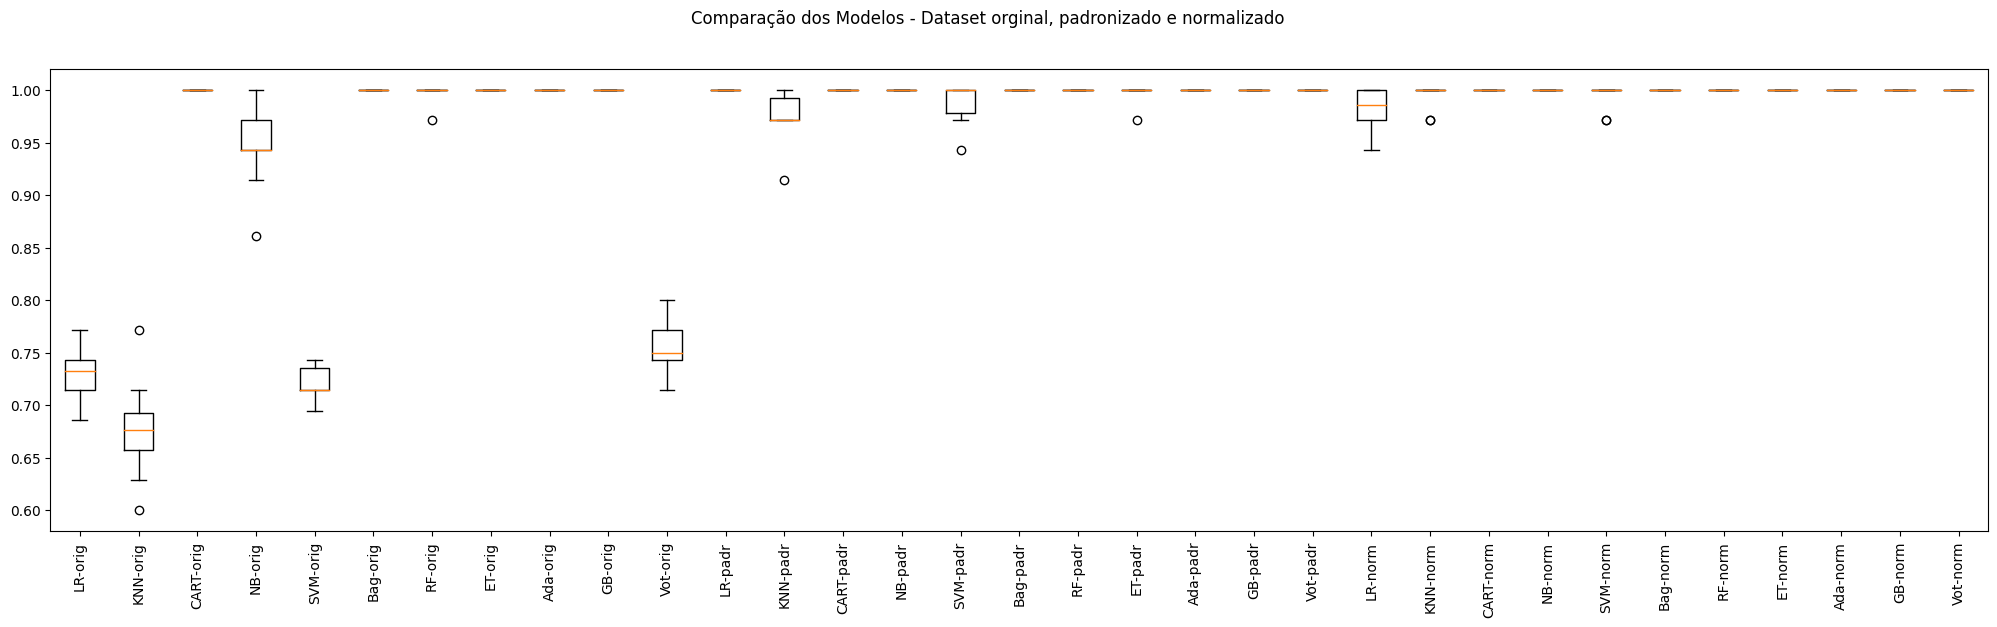

In [ ]:
np.random.seed(8) # definindo uma semente global para este bloco

# Listas para armazenar os armazenar os pipelines e os resultados para todas as visões do dataset
pipelines = []
results = []
names = []


# Criando os elementos do pipeline

# Algoritmos que serão utilizados
reg_log = ('LR', LogisticRegression(max_iter=200))
knn = ('KNN', KNeighborsClassifier())
cart = ('CART', DecisionTreeClassifier())
naive_bayes = ('NB', GaussianNB())
svm = ('SVM', SVC())
bagging = ('Bag', BaggingClassifier(base_estimator=base, n_estimators=num_trees))
random_forest = ('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features))
extra_trees = ('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features))
adaboost = ('Ada', AdaBoostClassifier(n_estimators=num_trees))
gradient_boosting = ('GB', GradientBoostingClassifier(n_estimators=num_trees))
voting = ('Voting', VotingClassifier(bases))

# Transformações que serão utilizadas
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())


# Montando os pipelines

# Dataset original
pipelines.append(('LR-orig', Pipeline([reg_log])))
pipelines.append(('KNN-orig', Pipeline([knn])))
pipelines.append(('CART-orig', Pipeline([cart])))
pipelines.append(('NB-orig', Pipeline([naive_bayes])))
pipelines.append(('SVM-orig', Pipeline([svm])))
pipelines.append(('Bag-orig', Pipeline([bagging])))
pipelines.append(('RF-orig', Pipeline([random_forest])))
pipelines.append(('ET-orig', Pipeline([extra_trees])))
pipelines.append(('Ada-orig', Pipeline([adaboost])))
pipelines.append(('GB-orig', Pipeline([gradient_boosting])))
pipelines.append(('Vot-orig', Pipeline([voting])))

# Dataset Padronizado
pipelines.append(('LR-padr', Pipeline([standard_scaler, reg_log])))
pipelines.append(('KNN-padr', Pipeline([standard_scaler, knn])))
pipelines.append(('CART-padr', Pipeline([standard_scaler, cart])))
pipelines.append(('NB-padr', Pipeline([standard_scaler, naive_bayes])))
pipelines.append(('SVM-padr', Pipeline([standard_scaler, svm])))
pipelines.append(('Bag-padr', Pipeline([standard_scaler, bagging])))
pipelines.append(('RF-padr', Pipeline([standard_scaler, random_forest])))
pipelines.append(('ET-padr', Pipeline([standard_scaler, extra_trees])))
pipelines.append(('Ada-padr', Pipeline([standard_scaler, adaboost])))
pipelines.append(('GB-padr', Pipeline([standard_scaler, gradient_boosting])))
pipelines.append(('Vot-padr', Pipeline([standard_scaler, voting])))

# Dataset Normalizado
pipelines.append(('LR-norm', Pipeline([min_max_scaler, reg_log])))
pipelines.append(('KNN-norm', Pipeline([min_max_scaler, knn])))
pipelines.append(('CART-norm', Pipeline([min_max_scaler, cart])))
pipelines.append(('NB-norm', Pipeline([min_max_scaler, naive_bayes])))
pipelines.append(('SVM-norm', Pipeline([min_max_scaler, svm])))
pipelines.append(('Bag-norm', Pipeline([min_max_scaler, bagging])))
pipelines.append(('RF-norm', Pipeline([min_max_scaler, random_forest])))
pipelines.append(('ET-norm', Pipeline([min_max_scaler, extra_trees])))
pipelines.append(('Ada-norm', Pipeline([min_max_scaler, adaboost])))
pipelines.append(('GB-norm', Pipeline([min_max_scaler, gradient_boosting])))
pipelines.append(('Vot-norm', Pipeline([min_max_scaler, voting])))

# Executando os pipelines
for name, model in pipelines:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std()) # formatando para 3 casas decimais
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(25,6))
fig.suptitle('Comparação dos Modelos - Dataset orginal, padronizado e normalizado')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=90)
plt.show()

Neste momento irei executar a otimização dos hiperparâmetros utilizando o SVM o qual gerou melhor resultado tando para a acurácia quanto para o Desvi Padrão utilizando a bibliotéca Grid Search. Vou utilizar a mesma métrica  de valores impares apresentados no exemplo da aula 3, o qual tentou utilizar os valores ímpares de k entre 1 e 21 e as métricas de distância euclidiana, manhattan e minkowski. Cada valor de k e de distância será avaliado usando a validação cruzada 10-fold no conjunto de dados padronizado, que mostrou resultados um pouco melhores do que os dados originais.

In [ ]:
# Tuning do KNN

np.random.seed(8) # definindo uma semente global para este bloco

pipelines = []

# Definindo os componentes do pipeline
knn = ('KNN', KNeighborsClassifier())
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

pipelines.append(('knn-orig', Pipeline(steps=[knn])))
pipelines.append(('knn-padr', Pipeline(steps=[standard_scaler, knn])))
pipelines.append(('knn-norm', Pipeline(steps=[min_max_scaler, knn])))

param_grid = {
    'KNN__n_neighbors': [1,3,5,7,9,11,13,15,17,19,21],
    'KNN__metric': ["euclidean", "manhattan", "minkowski"],
}

# Prepara e executa o GridSearchCV
for name, model in pipelines:
    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
    grid.fit(X_train, y_train)
    # imprime a melhor configuração
    print("Sem tratamento de missings: %s - Melhor: %f usando %s" % (name, grid.best_score_, grid.best_params_))

Sem tratamento de missings: knn-orig - Melhor: 0.718889 usando {'KNN__metric': 'euclidean', 'KNN__n_neighbors': 17}
Sem tratamento de missings: knn-padr - Melhor: 0.985794 usando {'KNN__metric': 'euclidean', 'KNN__n_neighbors': 3}
Sem tratamento de missings: knn-norm - Melhor: 1.000000 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 3}


O modelo KNN apresentou diferentes resultados de desempenho dependendo do tratamento de missing values aplicado.

No caso do modelo KNN sem tratamento de missing values (knn-orig), obteve-se uma acurácia de aproximadamente 71,9%.

Com o tratamento de missing values usando o StandardScaler (knn-padr), o modelo obteve uma melhoria significativa no desempenho, com uma acurácia de aproximadamente 98,6%.

Já com o tratamento de missing values usando o MinMaxScaler (knn-norm), o modelo alcançou uma acurácia perfeita de 100%.

Esses resultados mostram a importância do tratamento adequado dos missing values para melhorar o desempenho do modelo KNN na classificação dos dados.

Irei ajustar dois dos principais hiperparâmetros do algoritmo NB: o valor de alpha (suavização de Laplace) e a distribuição de probabilidade utilizada.

No Scikit-Learn, o algoritmo NB (implementado pela classe GaussianNB) assume uma distribuição Gaussiana e um valor de alpha igual a 1.0 por padrão.

Iremos testar diferentes valores de alpha e avaliar cada combinação de hiperparâmetros usando a função GridSearchCV. Neste caso, iremos utilizar a versão original dos dados, que produziu melhores resultados, ao invés dos dados padronizados utilizados anteriormente para o KNN.






In [ ]:
np.random.seed(8) # definindo uma semente global

# Definindo o modelo
model = GaussianNB()

# Definindo os parâmetros para ajuste
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}

# Criando o objeto GridSearchCV
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)

# Ajustando o modelo com os dados de treinamento
grid.fit(X_train, y_train)

# Imprimindo os resultados
print("Melhor: %f usando %s" % (grid.best_score_, grid.best_params_))

# Obtendo as previsões no conjunto de teste
predictions = grid.best_estimator_.predict(X_test)

# Calculando a acurácia no conjunto de teste
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Melhor: 0.934603 usando {'var_smoothing': 1e-09}
Accuracy: 93.18%


Com base nos resultados obtidos para o modelo de Naive Bayes, podemos observar que a melhor configuração encontrada foi utilizando um valor de suavização (var_smoothing) igual a 1e-09. Isso resultou em uma acurácia de 93.46%. Comparando com os modelos anteriores, como o SVM, Regressão Logística e o  Voting entre outros, o qual apresentou melhora na acurácia e não teve mudanças significativas.

Considerando esses resultados, iremos finalizar o modelo de Naive Bayes treinando-o em todo o conjunto de dados de treinamento, sem a aplicação da validação cruzada. Em seguida, faremos as predições para o conjunto de dados de teste que foi separado inicialmente, permitindo uma comparação dos resultados obtidos até o momento. Para essa etapa final, vamos utilizar novamente o modelo de Naive Bayes, que foi um dos modelos que apresentou melhor acurácia para o problema..

Accuracy score (NB) =  0.9318181818181818


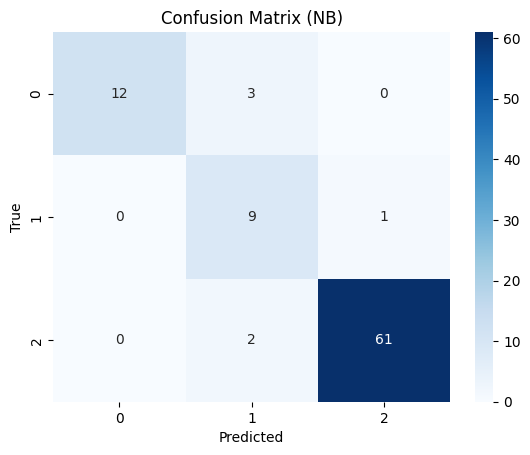

              precision    recall  f1-score   support

           1       1.00      0.80      0.89        15
           2       0.64      0.90      0.75        10
           3       0.98      0.97      0.98        63

    accuracy                           0.93        88
   macro avg       0.88      0.89      0.87        88
weighted avg       0.95      0.93      0.94        88



In [ ]:
from sklearn.naive_bayes import GaussianNB

# Preparação do modelo NB
model_nb = GaussianNB()
model_nb.fit(X_train, y_train)

# Estimativa da acurácia no conjunto de teste
predictions_nb = model_nb.predict(X_test)
print('Accuracy score (NB) = ', accuracy_score(y_test, predictions_nb))

# Matriz de confusão NB
cm_nb = confusion_matrix(y_test, predictions_nb)

# Plotagem da matriz de confusão NB
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (NB)')
plt.show()

print(classification_report(y_test, predictions_nb))

O modelo Naive Bayes apresentou uma alta acurácia de aproximadamente 93,2% na classificação das amostras do conjunto de teste. As métricas de precisão, recall e F1-score variaram para cada classe, indicando diferentes níveis de desempenho para cada uma delas. No geral, o modelo teve um bom desempenho na identificação das classes 1 e 3, com alta precisão, recall e F1-score. No entanto, para a classe 2, as métricas foram um pouco mais baixas, indicando uma capacidade inferior do modelo em identificar corretamente essa classe. Considerando a média ponderada das métricas, o modelo apresentou um bom desempenho geral na classificação das amostras.